In [1]:
import config
import torch
import sys
sys.path.append(config.root_path)


from Trainer import Trainer
from SemanticPequeNet import *
from util import *

from membrane_dataset import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
in_channels             = 1
num_classes             = 1
info_dataset_resolution = 256
info_dataset_batch_size = 8
train_loader, test_loader, val_loader = get_membrane_datasets(dataset_dir=config.dataset_path, 
                                              resolution=info_dataset_resolution, 
                                              batch_size=info_dataset_batch_size,
                                              augmented=True)

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])


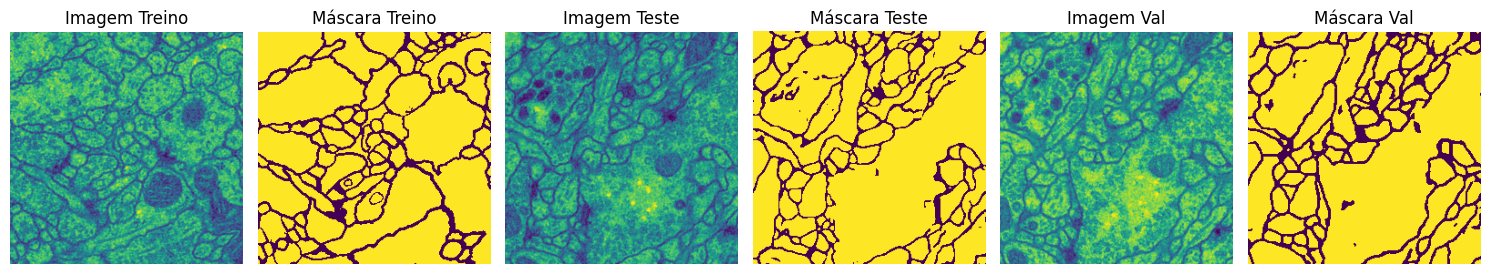

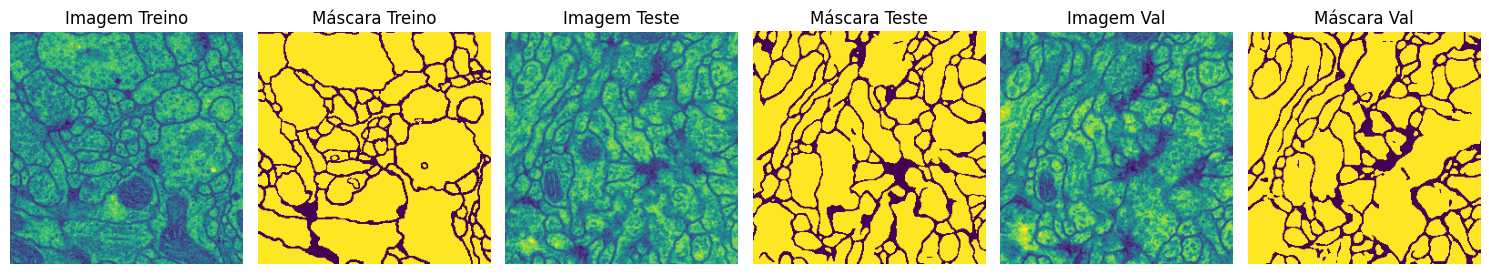

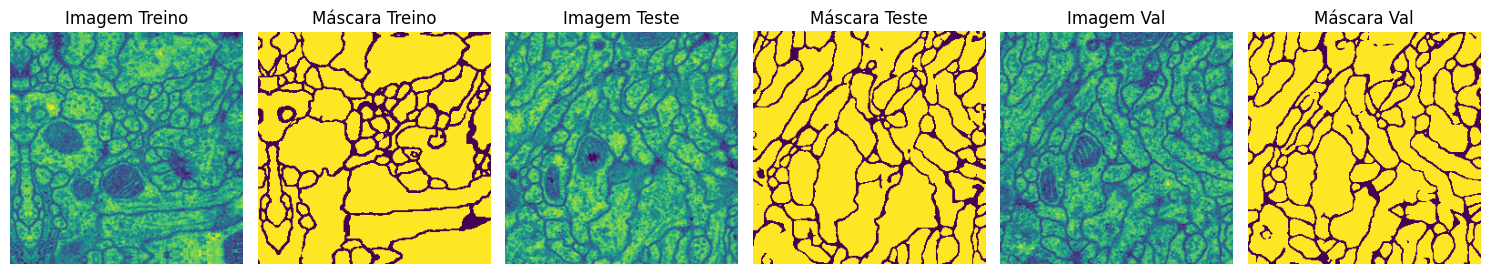

In [4]:
show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [6]:
def train(model, model_name=None,learning_rate = 1e-3,epochs = 300):
    if model_name is None:
        model_name    = model.__class__.__name__
    path          = './SemanticPequeNetCIARP'
    width_modifier      = model.width_modifier
    
                
    config = f'width_modifier={width_modifier}'
    print(count_trainable_parameters(model,format=True))

    model_filename = f'{model_name}-wm{width_modifier}-epochs{epochs}.pth'

    trainer = Trainer(model_filename=model_filename, 
                    model_dir=path, 
                    info={'config':config},
                    save_xlsx=True)
    trainer.num_classes = 1
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            verbose=1, 
                            save_every=5, 
                            save_outputs_every=25,
                            learning_rate=learning_rate,
                            continue_from_last=True)
    model.to(device)
    trainer.save_sample_output(test_loader,[0,1,2,3,4])
    del model
    clear_gpu()


In [ ]:
model = SemanticPequeNet(in_channels=in_channels, out_channels=num_classes, width_modifier=0.5)
train(model)

47.329
Parando na época 107 por early stopping. 0.1945 Dice: 0.9499 mIoU: 0.9046 IoU: 0.6363 Precision: 0.9643 Recall: 0.9359 Q: 0.8593 Tempo total: 00:07:14 LR:0.000250

Melhor modelo:
 Epoch [24/300] - Loss: 0.2555 Val Loss: 0.2193 Dice: 0.9412 mIoU: 0.8889 IoU: 0.5879 Precision: 0.9569 Recall: 0.9260 Q: 0.8366 Tempo total: 00:01:39 LR:0.001000
Ultimo modelo:
 Epoch [107/300] - Loss: 0.2105 Val Loss: 0.1945 Dice: 0.9499 mIoU: 0.9046 IoU: 0.6363 Precision: 0.9643 Recall: 0.9359 Q: 0.8593 Tempo total: 00:07:14 LR:0.000250 FPS: 580.24
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-wm0.5-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample3-SemanticPequeNet-wm0.5-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample4-SemanticPequeN

In [ ]:
model = SemanticPequeNet(in_channels=in_channels, out_channels=num_classes, width_modifier=1.0)
train(model)

170.305
Parando na época 47 por early stopping. 0.1901 Dice: 0.9549 mIoU: 0.9138 IoU: 0.6641 Precision: 0.9678 Recall: 0.9425 Q: 0.8726 Tempo total: 00:05:54 LR:0.000500

Melhor modelo:
 Epoch [9/300] - Loss: 0.2797 Val Loss: 0.2273 Dice: 0.9385 mIoU: 0.8841 IoU: 0.5790 Precision: 0.9572 Recall: 0.9205 Q: 0.8298 Tempo total: 00:01:09 LR:0.001000
Ultimo modelo:
 Epoch [47/300] - Loss: 0.1894 Val Loss: 0.1901 Dice: 0.9549 mIoU: 0.9138 IoU: 0.6641 Precision: 0.9678 Recall: 0.9425 Q: 0.8726 Tempo total: 00:05:54 LR:0.000500 FPS: 265.84
Saved as ./SemanticPequeNetCIARP/SemanticPequeNet-wm1-epochs300.pth
./SemanticPequeNetCIARP/outputs/sample0-SemanticPequeNet-wm1-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample1-SemanticPequeNet-wm1-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample2-SemanticPequeNet-wm1-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample3-SemanticPequeNet-wm1-epochs300.png saved.
./SemanticPequeNetCIARP/outputs/sample4-SemanticPequeNet-wm1-epoch